In [1]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import scale, normalize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

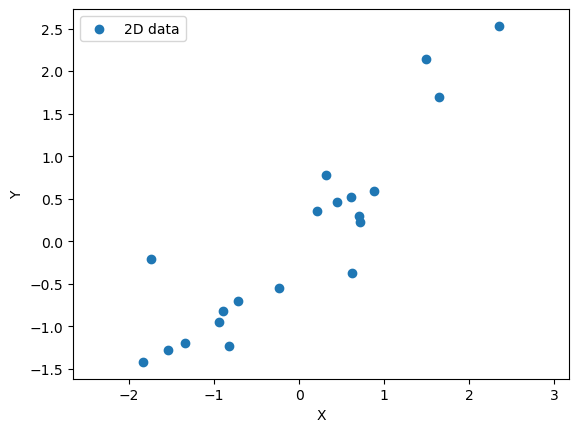

In [2]:
np.random.seed(102)
x = np.random.multivariate_normal([0, 0], [[1, .9], [.9, 1]], size=20).T
plt.axis('equal')
plt.scatter(x[0], x[1], label="2D data")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [3]:
np.cov(x)

array([[1.41195704, 1.22429704],
       [1.22429704, 1.30130837]])

In [5]:
x

array([[-1.83286086, -0.82541364, -1.34089287,  0.69887446,  0.6272018 ,
        -0.94311591,  0.72068816,  0.31173648,  1.63846991,  0.44128457,
        -1.54386689,  0.87672154, -0.89803542,  2.34758457, -0.71681398,
         0.21340478, -1.73859025,  0.60956993,  1.49712925, -0.23870639],
       [-1.41880287, -1.23700176, -1.19278333,  0.29499635, -0.37375323,
        -0.95393168,  0.22461006,  0.77790593,  1.69934458,  0.46408344,
        -1.2786073 ,  0.59624459, -0.82526583,  2.53129589, -0.70378209,
         0.35396091, -0.2052903 ,  0.51826546,  2.14265253, -0.54762606]])

In [6]:
def get_projection(axis=[1, 1], seed=100):
    axis = np.array(axis).reshape((1, 2))
    axis_normalized = normalize(axis).reshape((1, 2))
    np.random.seed(seed)
    x = np.random.multivariate_normal([0, 0], [[1, .9], [.9, 1]], size=20).T
    plt.scatter(x[0], x[1], label="2D data")
    # get projection
    projection = axis_normalized.T.dot(axis_normalized.dot(x))
    plt.scatter(projection[0], projection[1], marker="x", c='g', label="1D data")
    plt.plot([projection[0], x[0]], [projection[1], x[1]], 'r-', lw=1)
    plt.axis('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    # Plotting x axis and y axis
    plt.plot(range(-2, 4) * axis_normalized[0][0], range(-2, 4) * axis_normalized[0][1], 'k-', lw=1)
    plt.legend()
    plt.show()

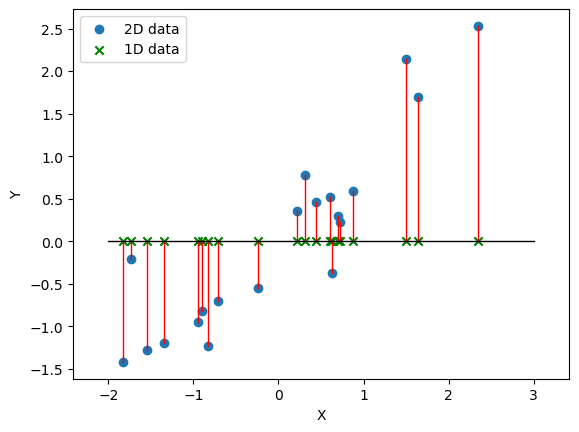

In [7]:
get_projection(axis=[1, 0], seed=102)

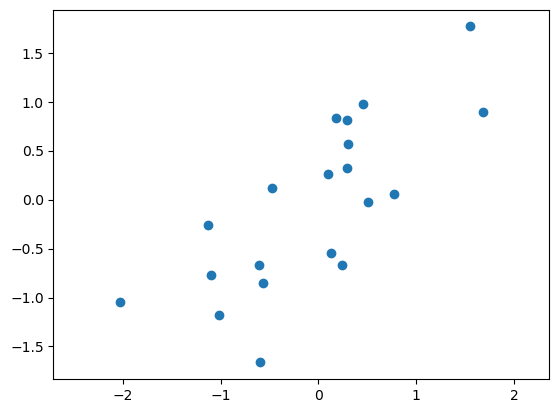

In [8]:
np.random.seed(100)
x = np.random.multivariate_normal([0, 0], [[1, .8], [.8, 1]], size=20).T
plt.axis('equal')
plt.scatter(x[0], x[1])
plt.show()

In [9]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data

In [10]:
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
x = normalize(x)
pca = PCA()
pca_data = pca.fit_transform(x)

In [11]:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

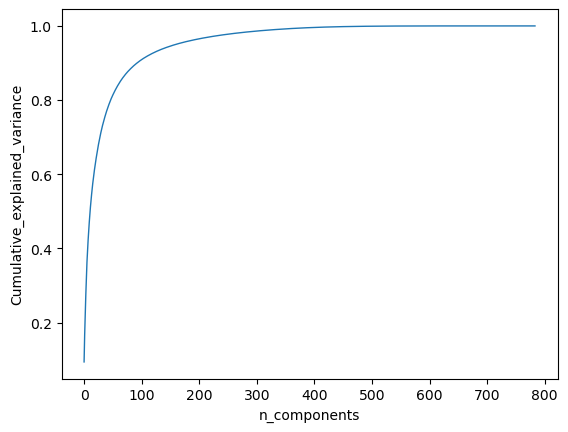

In [12]:
plt.plot(cum_var_explained, linewidth=1)
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

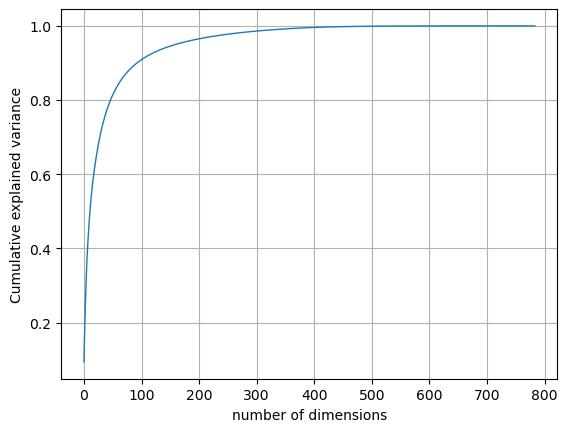

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=1)
plt.grid()
plt.xlabel('number of dimensions')
plt.ylabel('Cumulative explained variance')
plt.show()

In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09412583, 0.16734156, 0.22602708, 0.27567637, 0.32222501,
       0.36309903, 0.39398374, 0.42261568, 0.44761319, 0.47075055,
       0.49210317, 0.51138214, 0.52884589, 0.54517984, 0.56038665,
       0.5748189 , 0.58780812, 0.60028992, 0.61209286, 0.62315569,
       0.63361993, 0.64370222, 0.65337876, 0.6626639 , 0.67178727,
       0.68057348, 0.68861946, 0.69658743, 0.70416074, 0.71153487,
       0.71845974, 0.72522828, 0.73145203, 0.73738248, 0.74321955,
       0.74893311, 0.75431368, 0.75963573, 0.76472087, 0.7696761 ,
       0.77442377, 0.77905579, 0.78344447, 0.7877065 , 0.79189954,
       0.79603811, 0.79993558, 0.80367023, 0.8073251 , 0.81071456,
       0.81406227, 0.8173644 , 0.82054153, 0.82363098, 0.82666784,
       0.8296203 , 0.83251858, 0.8353293 , 0.83806716, 0.84071571,
       0.84330883, 0.84586471, 0.84835657, 0.85076268, 0.8531224 ,
       0.85541002, 0.85762546, 0.85977709, 0.86187103, 0.86394892,
       0.86592939, 0.86788861, 0.86979492, 0.87167454, 0.87347

In [15]:
pca.explained_variance_ratio_

array([9.41258263e-02, 7.32157350e-02, 5.86855182e-02, 4.96492927e-02,
       4.65486378e-02, 4.08740160e-02, 3.08847133e-02, 2.86319390e-02,
       2.49975166e-02, 2.31373539e-02, 2.13526177e-02, 1.92789746e-02,
       1.74637446e-02, 1.63339577e-02, 1.52068042e-02, 1.44322562e-02,
       1.29892138e-02, 1.24818045e-02, 1.18029390e-02, 1.10628333e-02,
       1.04642341e-02, 1.00822898e-02, 9.67653875e-03, 9.28514748e-03,
       9.12336664e-03, 8.78620478e-03, 8.04598151e-03, 7.96796780e-03,
       7.57331708e-03, 7.37412778e-03, 6.92487303e-03, 6.76854085e-03,
       6.22374095e-03, 5.93045267e-03, 5.83707501e-03, 5.71355261e-03,
       5.38057126e-03, 5.32204856e-03, 5.08514237e-03, 4.95523335e-03,
       4.74766779e-03, 4.63201759e-03, 4.38868390e-03, 4.26202605e-03,
       4.19304232e-03, 4.13857002e-03, 3.89747072e-03, 3.73465320e-03,
       3.65486982e-03, 3.38945330e-03, 3.34771386e-03, 3.30213179e-03,
       3.17712598e-03, 3.08944862e-03, 3.03686113e-03, 2.95245946e-03,
      